In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [17]:
df = pd.read_csv(r'C:\Users\nguyen\OneDrive\Tài liệu\baitaplonn\Time_Series_with_Python\notebook\data\raw\sales_train_validation.csv')
df.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


```
📊 Dữ liệu này nói về gì?

Đây là dữ liệu bán lẻ theo ngày (daily sales data) của chuỗi siêu thị Walmart ở Mỹ.
Nó ghi lại số lượng sản phẩm được bán mỗi ngày trong hơn 5 năm (2011–2016).
```

```
id: Mã định danh của sản phẩm, kết hợp item_id, store_id, và hậu tố _validation.
item_id: Mã sản phẩm.
dept_id: Mã phòng ban (department) chứa sản phẩm.
cat_id: Mã danh mục (category) chứa phòng ban.
store_id: Mã cửa hàng bán sản phẩm.
state_id: Bang/tiểu bang của cửa hàng.

Từ d_1 → d_1913 = doanh số (số lượng bán ra) theo từng ngày.
d_1 = 2011-01-29,
d_1913 = 2016-05-22 (mapping trong file calendar.csv).


```

# 1 thông tin chung về dữ liệu 

In [6]:
# Lấy danh sách cột
columns = df.columns.tolist()

# Kiểm tra tên cột trùng lặp
duplicates = df.columns[df.columns.duplicated()].tolist()

# Kiểm tra tên cột có khoảng trắng
whitespace_cols = [col for col in columns if " " in col]

# Kiểm tra tên cột có ký tự đặc biệt (chỉ cho phép chữ, số, và "_")
special_char_cols = [col for col in columns if not re.match(r'^[A-Za-z0-9_]+$', col)]

print("Tên cột trùng lặp:", duplicates if duplicates else "Không có")
print("Tên cột chứa khoảng trắng:", whitespace_cols if whitespace_cols else "Không có")
print("Tên cột chứa ký tự đặc biệt:", special_char_cols if special_char_cols else "Không có")

Tên cột trùng lặp: Không có
Tên cột chứa khoảng trắng: Không có
Tên cột chứa ký tự đặc biệt: Không có


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


```
-DataFrame có 30,490 dòng, đánh số từ 0 đến 30,489.
-Có 1,919 cột, cột đầu tiên là id, cột cuối cùng là d_1913.
- 1,913 cột kiểu số nguyên (int64),
-6 cột kiểu chuỗi / hỗn hợp (object).
DataFrame chiếm ~446 MB trong RAM.
```

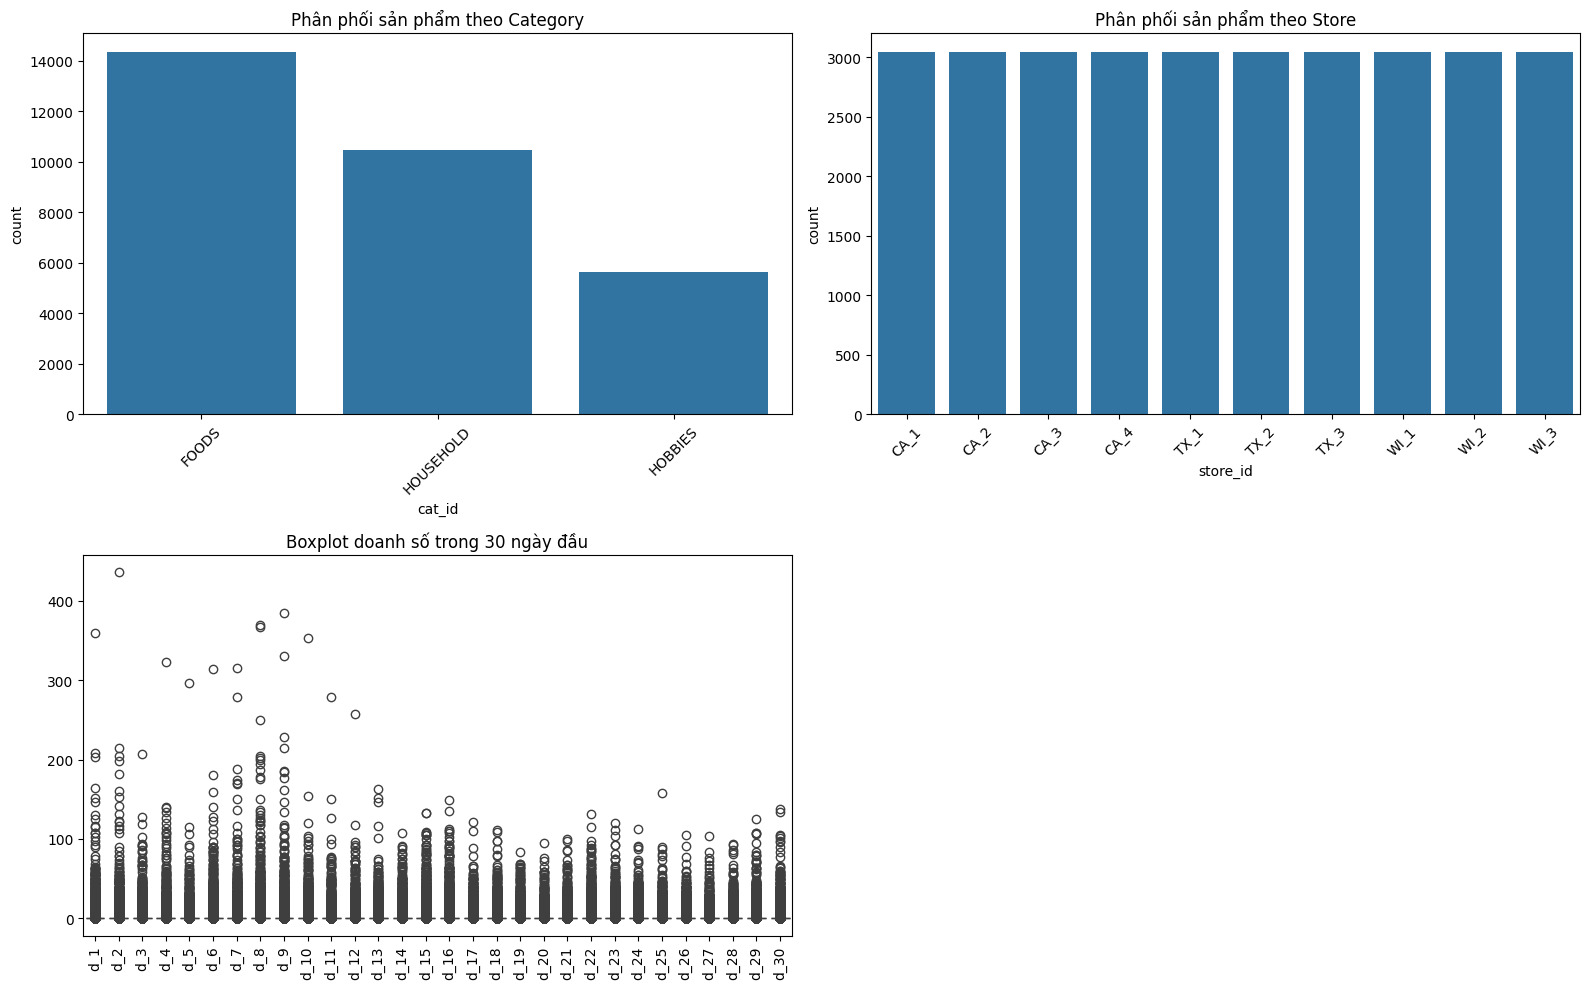

In [18]:

# Lấy một số cột bán hàng theo ngày (ví dụ d_1 -> d_30)
sales_cols = [col for col in df.columns if col.startswith("d_")][:30]

# Tạo figure với 3 subplot (2 hàng, 2 cột)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- Barplot phân phối sản phẩm theo Category ---
sns.countplot(data=df, x="cat_id", order=df["cat_id"].value_counts().index, ax=axes[0,0])
axes[0,0].set_title("Phân phối sản phẩm theo Category")
axes[0,0].tick_params(axis='x', rotation=45)

# --- Barplot phân phối sản phẩm theo Store ---
sns.countplot(data=df, x="store_id", order=df["store_id"].value_counts().index, ax=axes[0,1])
axes[0,1].set_title("Phân phối sản phẩm theo Store")
axes[0,1].tick_params(axis='x', rotation=45)

# --- Boxplot doanh số 30 ngày đầu ---
sns.boxplot(data=df[sales_cols], ax=axes[1,0])
axes[1,0].set_title("Boxplot doanh số trong 30 ngày đầu")
axes[1,0].tick_params(axis='x', rotation=90)

# Tắt subplot trống (ô 1,1)
axes[1,1].axis("off")

# Điều chỉnh layout
plt.tight_layout()
plt.show()


# 2 lọc gia trị missing

In [8]:
print(df.isnull().sum())
print(df.isnull().mean() * 100)

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64
id          0.0
item_id     0.0
dept_id     0.0
cat_id      0.0
store_id    0.0
           ... 
d_1909      0.0
d_1910      0.0
d_1911      0.0
d_1912      0.0
d_1913      0.0
Length: 1919, dtype: float64


=> tập dữ liệu không có giá trị missing

# 3 Lọc giá trị trùng lặp

In [9]:
# Kiểm tra số lượng dòng trùng lặp
duplicate_count = df.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicate_count}")

# Hiển thị các dòng trùng lặp (nếu có)
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

Số dòng trùng lặp: 0


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913


# 4 kiểm tra giá trị ngoại lệ 

Khi áp dụng công thức IQR (ngưỡng 1.5 * IQR), các điểm tăng vọt này dễ bị coi là ngoại lệ, dù thật ra chúng hợp lý trong ngữ cảnh.Nên trong trường hợp này ta dùng phương pháp Modified Z-score (MAD)

In [15]:

# Chọn cột số
numeric_cols = df.select_dtypes(include=['number']).columns


#danh sách lưu kết quả
outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    
    if mad == 0:
        continue
    
    modified_z_scores = 0.6745 * (data - median) / mad
    outlier_count = np.sum(np.abs(modified_z_scores) > 3.5)
    
    if outlier_count > 0:
        outlier_summary.append({
            "Cột": col,
            "Số lượng ngoại lệ": outlier_count
        })

# Tổng hợp thành DataFrame
outlier_count_df = pd.DataFrame(outlier_summary).sort_values(by="Số lượng ngoại lệ", ascending=False)

display(outlier_count_df)


# Dictionary lưu các cột có ngoại lệ
outliers_all = {}

for col in numeric_cols:
    data = df[col].dropna()
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    
    if mad == 0:
        continue
    
    modified_z_scores = 0.6745 * (data - median) / mad
    outlier_rows = df[np.abs(modified_z_scores) > 3.5]
    
    if not outlier_rows.empty:
        # Lưu nguyên cột để hiển thị đầy đủ
        outliers_all[col] = outlier_rows[col]

# Ghép tất cả các cột ngoại lệ lại thành một DataFrame
outliers_df = pd.DataFrame(outliers_all)

# Hiển thị
display(outliers_df.head(20))  


,Cột,Số lượng ngoại lệ
0,d_1898,1908


,d_1898
7,12
14,10
29,19
47,11
142,8
183,8
246,14
260,8
278,7
280,10


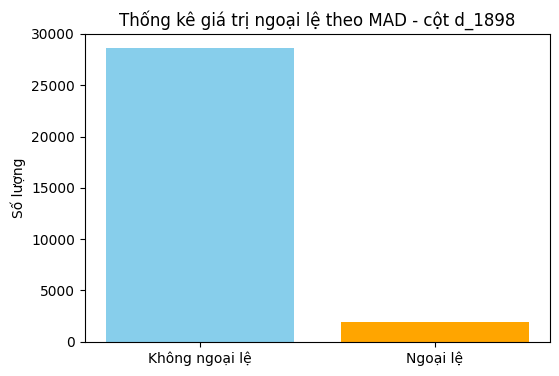

In [20]:

# Chọn cột d_1898
series = df["d_1898"].values

# Hàm phát hiện ngoại lệ MAD
def detect_outliers_mad(series, threshold=3.5):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return np.zeros_like(series, dtype=bool)
    modified_z_score = 0.6745 * (series - median) / mad
    return np.abs(modified_z_score) > threshold

# Tạo mask ngoại lệ
mask = detect_outliers_mad(series)
num_outliers = mask.sum()
num_non_outliers = len(series) - num_outliers

# Barplot so sánh số lượng
plt.figure(figsize=(6,4))
plt.bar(["Không ngoại lệ", "Ngoại lệ"], [num_non_outliers, num_outliers], color=["skyblue","orange"])
plt.ylabel("Số lượng")
plt.title("Thống kê giá trị ngoại lệ theo MAD - cột d_1898")
plt.show()



# 5 kiểm tra giá trị bất thường


In [11]:
#kiểm tra giá trị bất thường
df.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,98.000000,100.000000,88.000000,77.000000,141.000000,171.000000,130.000000


In [12]:
# số lượng giá trị duy nhất
df.nunique()

id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
            ...  
d_1909         53
d_1910         57
d_1911         61
d_1912         73
d_1913         65
Length: 1919, dtype: int64

1. Kiểm tra logic dữ liệu
Số lượng bán ra phải ≥ 0.
Giá trị phải là số nguyên (không có 2.5 sản phẩm).
Không có giá trị quá lớn bất thường (ví dụ hàng triệu sản phẩm trong 1 ngày).

In [13]:

# 1. Giá trị âm (không hợp lý trong bán hàng)
negative_values = (df.select_dtypes(include=['number']) < 0).sum()

# 2. Giá trị không nguyên (float thay vì int)
non_integer_values = (df.select_dtypes(include=['number']) % 1 != 0).sum()

# 3. Giá trị quá lớn bất thường (ví dụ > 10,000 sp/ngày)
too_large_values = (df.select_dtypes(include=['number']) > 10000).sum()

# Tổng hợp lại
anomaly_summary = pd.DataFrame({
    "Giá trị âm": negative_values,
    "Không nguyên": non_integer_values,
    "Quá lớn >10,000": too_large_values
})

display(anomaly_summary)


,Giá trị âm,Không nguyên,"Quá lớn >10,000"
d_1,0,0,0
d_2,0,0,0
d_3,0,0,0
d_4,0,0,0
d_5,0,0,0
...,...,...,...
d_1909,0,0,0
d_1910,0,0,0
d_1911,0,0,0
d_1912,0,0,0


2. Kiểm tra tính liên tục (time-series anomalies)
Có những ngày toàn bộ sản phẩm = 0 → có thể dữ liệu bị thiếu.
Có những ngày tăng vọt bất thường toàn bộ sản phẩm → cần xem có phải do nhập sai.

In [14]:
# Tính tổng doanh số theo ngày (tất cả sản phẩm)
daily_sales = df.select_dtypes(include=['number']).sum(axis=0)

# Ngày có doanh số = 0
zero_days = daily_sales[daily_sales == 0]

# Ngày có doanh số cao bất thường (gấp 5 lần trung bình)
mean_sales = daily_sales.mean()
anomaly_days = daily_sales[daily_sales > 5 * mean_sales]

print("Số ngày doanh số = 0:", len(zero_days))
print("Số ngày doanh số cao bất thường:", len(anomaly_days))


Số ngày doanh số = 0: 0
Số ngày doanh số cao bất thường: 0
